In [24]:
import pandas as pd
df = pd.read_csv('askelmittaus.csv', decimal= '.', delimiter=',')
df.head()

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.019010,0.076054,-0.169756,-0.186491,0.263401
1,0.027006,0.023406,-0.121967,-0.198365,0.234035
2,0.034971,-0.037507,-0.093715,-0.233411,0.254303
3,0.042967,-0.011665,-0.095817,-0.227117,0.246778
4,0.050962,0.062580,-0.134217,-0.155195,0.214514


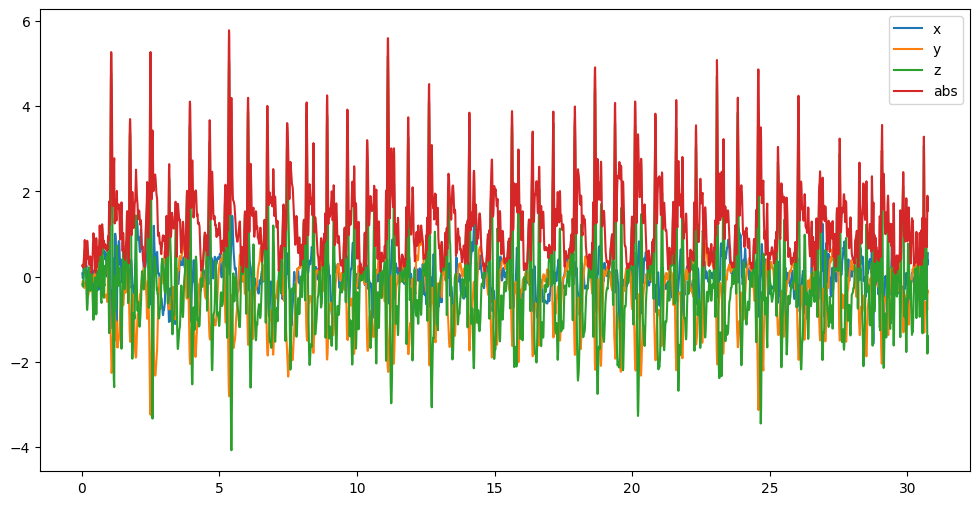

Time (s)                         59156.345436
Linear Acceleration x (m/s^2)     1241.034564
Linear Acceleration y (m/s^2)     2416.367439
Linear Acceleration z (m/s^2)     3640.129062
Absolute acceleration (m/s^2)     5017.581794
dtype: float64

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'],df['Linear Acceleration x (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration y (m/s^2)'])
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.plot(df['Time (s)'],df['Absolute acceleration (m/s^2)'])
plt.legend(['x','y','z','abs'])
plt.show()
(df.abs()).sum()

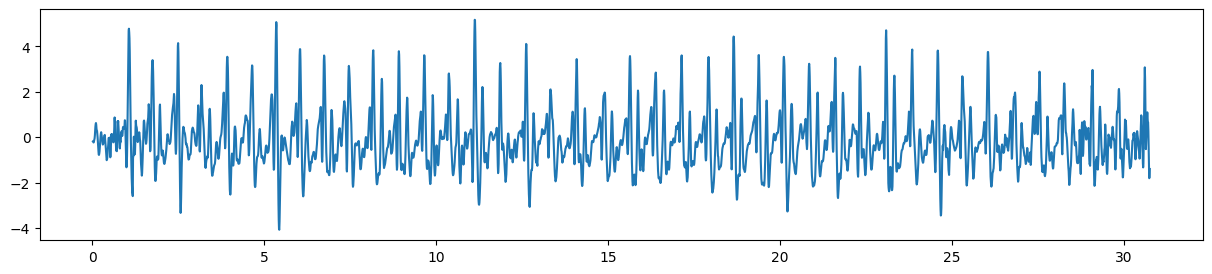

In [26]:
fig = plt.figure(figsize=(15,3))
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'])
plt.show()

In [27]:
from scipy.signal import butter, filtfilt

def butter_lowpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def butter_highpass_filter(data, cutoff, fs, nyq, order):
    normal_cutoff = cutoff / nyq

    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data)
    return y

In [28]:
noisy_signal = df['Linear Acceleration z (m/s^2)']
   
T= df['Time (s)'][len(df)-1] - df['Time (s)'][0]
n = int(len(df['Time (s)']))
fs = n/T

cutoff = 1/(0.5)
cutoff2 = 1/(5)

nyq = 0.5 * fs
order = 1

lowpass_filtered = butter_lowpass_filter(noisy_signal, cutoff, fs, nyq, order)
highpass_filtered = butter_highpass_filter(noisy_signal, cutoff2, fs, nyq, order)

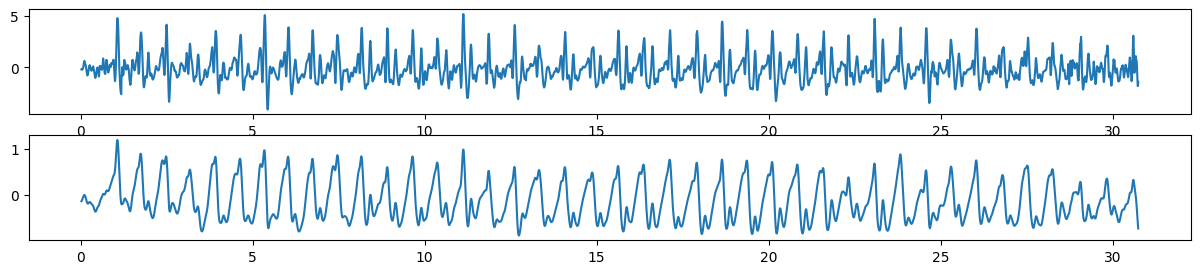

In [29]:
fig = plt.figure(figsize=(15,3))
plt.subplot(2,1,1)
plt.plot(df['Time (s)'],df['Linear Acceleration z (m/s^2)'])
plt.subplot(2,1,2)
plt.plot(df['Time (s)'],lowpass_filtered)
plt.show()

In [30]:
#itse laskettu askelten määrä: 41
steps = 0
for i in range(lowpass_filtered.shape[0]-1):
    if lowpass_filtered[i]/lowpass_filtered[i+1] < 0:
        steps = steps + 0.5
print("Number of steps:", steps)

Number of steps: 42.0
